By Bernard Djoko and Yasaman Monazzah

In [95]:
# Core Libraries
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis

# Data Vizualiation
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder  # Data scaling and encoding
from sklearn.model_selection import train_test_split  # Splitting data into train/test sets

# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression  # Regression models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # Decision trees
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Random forests
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor  # Gradient Boosting
from sklearn.svm import SVC, SVR  # Support Vector Machines (classification and regression)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor  # k-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # Classification metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score  # Advanced classification metrics
from sklearn.model_selection import KFold  # Import KFold for cross-validation
from sklearn.model_selection import cross_val_score  # Import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [45]:
# Load dataset
df = pd.read_excel(r'C:\Users\User\Desktop\10Alytics\Machine Learning\AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## EDA

In [47]:
# Inspect the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [49]:
# Check for missing values
print("Missing values:", df.isnull().sum())

Missing values: Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [51]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print(f"Total duplicate rows found: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Total duplicate rows found: 0
Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []


In [53]:
# Get all rows where any column has a value of -200
negative_200_values = df[(df == -200).any(axis=1)]

# Display the rows with -200 values
print(negative_200_values)

           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
9    2004-03-11  03:00:00     0.6      1009.75        19   1.696658   
10   2004-03-11  04:00:00  -200.0      1011.00        14   1.293620   
33   2004-03-12  03:00:00     0.8       888.75        21   1.869445   
34   2004-03-12  04:00:00  -200.0       831.00        10   1.068293   
39   2004-03-12  09:00:00  -200.0      1544.50      -200  22.074162   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9            560.75   -200.0       1705.00   -200.0       1234.75   
10       

In [55]:
# Count the number of rows that contain -200 in any column
negative_200_count = (df == -200).any(axis=1).sum()

# Display the count
print(f"Number of rows containing -200: {negative_200_count}")

Number of rows containing -200: 8530


In [57]:
# Replace Missing Values us KNN or better data integrity
# Convert the Date column to datetime: KNN does not handle datatime so we put this aside first
df['Date'] = pd.to_datetime(df['Date'])

# Replace -200 with NaN for proper handling of missing values
df.replace(-200, np.nan, inplace=True)

# Separate numeric columns for imputation
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Apply KNN imputation to numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_columns] = knn_imputer.fit_transform(df[numeric_columns])

# Display the DataFrame after imputation
print(df)

           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25     323.2  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50     323.2  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00     323.2  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50     305.2   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75     334.8  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1        

In [59]:
# Count the number of rows that contain -200 in any column
negative_200_count = (df == -200).any(axis=1).sum()

# Display the count
print(f"Number of rows containing -200: {negative_200_count}")

Number of rows containing -200: 0


In [28]:
# Describe dataset
df.describe()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,1900-01-01 11:29:54.806028032,2.087226,1100.168880,229.636205,10.141917,941.317063,234.037553,832.826034,108.889161,1456.696927,1025.611215,18.378436,49.165415,1.025503
min,2004-03-10 00:00:00,1900-01-01 00:00:00,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,2004-06-16 00:00:00,1900-01-01 05:00:00,1.000000,938.500000,130.400000,4.500867,737.250000,90.000000,657.750000,73.000000,1232.750000,739.250000,12.000000,36.299999,0.745798
50%,2004-09-21 00:00:00,1900-01-01 11:00:00,1.760000,1065.750000,175.600000,8.344623,912.750000,168.200000,802.750000,104.000000,1460.050000,968.500000,17.900000,49.325000,0.997652
75%,2004-12-28 00:00:00,1900-01-01 18:00:00,2.780000,1228.750000,323.200000,14.011592,1117.000000,307.000000,964.750000,136.000000,1672.500000,1273.250000,24.350000,62.050000,1.297703
max,2005-04-04 00:00:00,1900-01-01 23:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,NaN,1.417392,214.689245,147.334106,7.425270,265.673392,205.659842,253.967846,47.107753,341.971233,394.896761,8.717854,17.088858,0.396725


In [61]:
# Convert to datetime, coercing errors to NaT
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Check for rows with invalid times
invalid_times = df[df['Time'].isna()]
print(invalid_times)

# Drop rows with invalid times (if applicable)
df = df.dropna(subset=['Time'])

Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []


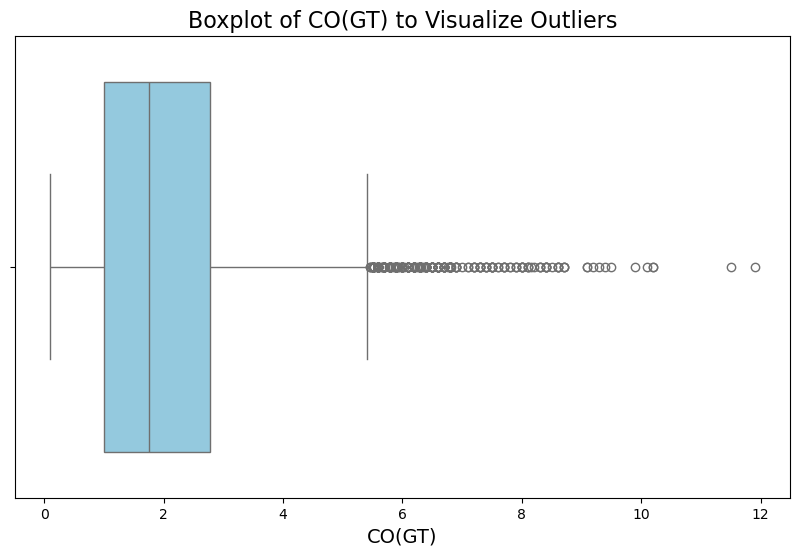

In [63]:
# Boxplot for 'CO(GT)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CO(GT)'], color="skyblue")
plt.title('Boxplot of CO(GT) to Visualize Outliers', fontsize=16)
plt.xlabel('CO(GT)', fontsize=14)
plt.show()

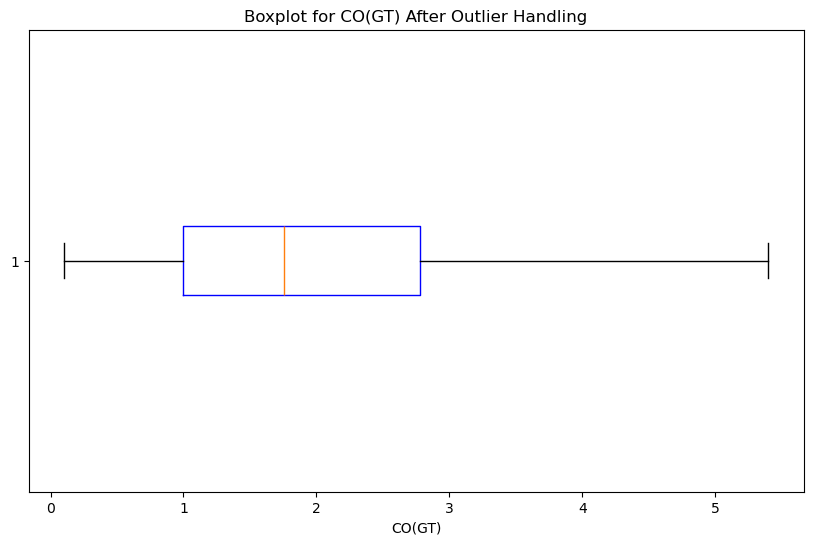


Outliers in 'CO(GT)' handled using the IQR method and replaced with KNN imputation.

Statistics Before Cleaning:
             CO(GT)
count  9357.000000
mean      2.087226
std       1.417392
min       0.100000
25%       1.000000
50%       1.760000
75%       2.780000
max      11.900000

Statistics After Cleaning:
             CO(GT)
count  9357.000000
mean      2.032757
std       1.257193
min       0.100000
25%       1.000000
50%       1.760000
75%       2.780000
max       5.400000


In [33]:
# Ensure the DataFrame `df` already exists and contains the necessary columns
imputer = KNNImputer(n_neighbors=5)  # Initialize KNN imputer
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns

# Define a function to handle outliers and apply imputation
def handle_outliers_and_impute(df, column, imputer):
    if column in df.columns:
        # Calculate IQR for outlier detection
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with np.nan
        df[column] = df[column].apply(lambda x: np.nan if pd.notna(x) and (x < lower_bound or x > upper_bound) else x)

        # Apply KNN imputation to handle NaN values
        df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

        # Visualize the cleaned data
        plt.figure(figsize=(10, 6))
        plt.boxplot(df[column].dropna(), vert=False, boxprops=dict(color="blue"))
        plt.title(f'Boxplot for {column} After Outlier Handling')
        plt.xlabel(column)
        plt.show()

        print(f"\nOutliers in '{column}' handled using the IQR method and replaced with KNN imputation.")
    else:
        print(f"\nColumn '{column}' not found in the dataset.")
# Define a function to compare statistics before and after handling outliers
def compare_statistics(df_original, df_cleaned, columns):
    before_stats = df_original[columns].describe()
    after_stats = df_cleaned[columns].describe()
    print("\nStatistics Before Cleaning:\n", before_stats)
    print("\nStatistics After Cleaning:\n", after_stats)

# Make a copy of the original DataFrame for comparison
df_original = df.copy()

# Handle outliers and impute for CO(GT)
handle_outliers_and_impute(df, 'CO(GT)', imputer)

# Compare statistics for selected columns
compare_statistics(df_original, df, ['CO(GT)'])

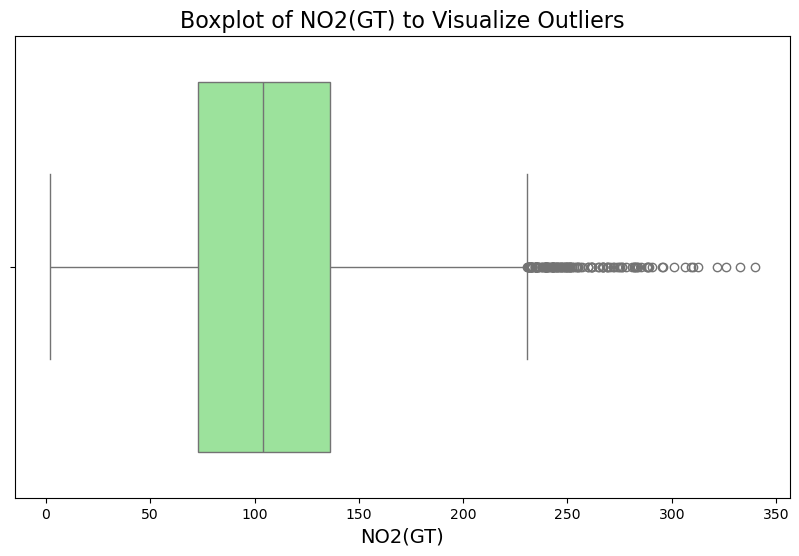

In [65]:
# Boxplot for 'NO2(GT)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NO2(GT)'], color="lightgreen")
plt.title('Boxplot of NO2(GT) to Visualize Outliers', fontsize=16)
plt.xlabel('NO2(GT)', fontsize=14)
plt.show()

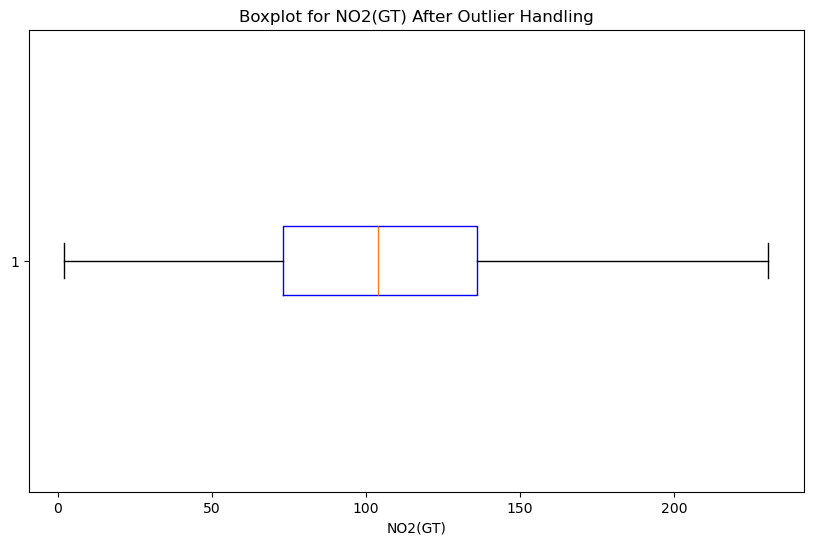


Outliers in 'NO2(GT)' handled using the IQR method and replaced with KNN imputation.

Statistics Before Cleaning:
            NO2(GT)
count  9357.000000
mean    108.889161
std      47.107753
min       2.000000
25%      73.000000
50%     104.000000
75%     136.000000
max     339.700000

Statistics After Cleaning:
            NO2(GT)
count  9357.000000
mean    107.850969
std      44.529862
min       2.000000
25%      73.000000
50%     104.000000
75%     136.000000
max     230.500000


In [67]:
# Ensure the DataFrame `df` already exists and contains the necessary columns
imputer = KNNImputer(n_neighbors=5)  # Initialize KNN imputer
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns

# Define a function to handle outliers and apply imputation
def handle_outliers_and_impute(df, column, imputer):
    if column in df.columns:
        # Calculate IQR for outlier detection
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with np.nan
        df[column] = df[column].apply(lambda x: np.nan if pd.notna(x) and (x < lower_bound or x > upper_bound) else x)

        # Apply KNN imputation to handle NaN values
        df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

        # Visualize the cleaned data
        plt.figure(figsize=(10, 6))
        plt.boxplot(df[column].dropna(), vert=False, boxprops=dict(color="blue"))
        plt.title(f'Boxplot for {column} After Outlier Handling')
        plt.xlabel(column)
        plt.show()

        print(f"\nOutliers in '{column}' handled using the IQR method and replaced with KNN imputation.")
    else:
        print(f"\nColumn '{column}' not found in the dataset.")

# Define a function to compare statistics before and after handling outliers
def compare_statistics(df_original, df_cleaned, columns):
    before_stats = df_original[columns].describe()
    after_stats = df_cleaned[columns].describe()
    print("\nStatistics Before Cleaning:\n", before_stats)
    print("\nStatistics After Cleaning:\n", after_stats)

# Make a copy of the original DataFrame for comparison
df_original = df.copy()

# Handle outliers and impute for NO2(GT)
handle_outliers_and_impute(df, 'NO2(GT)', imputer)

# Compare statistics for selected columns
compare_statistics(df_original, df, ['NO2(GT)'])

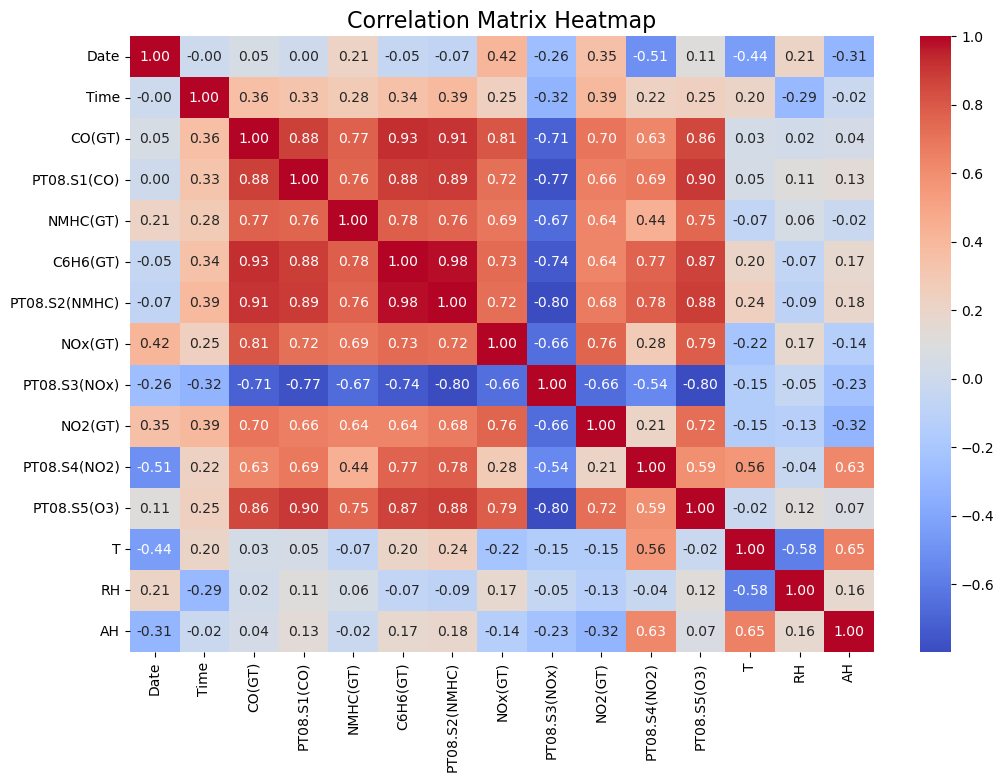

In [69]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

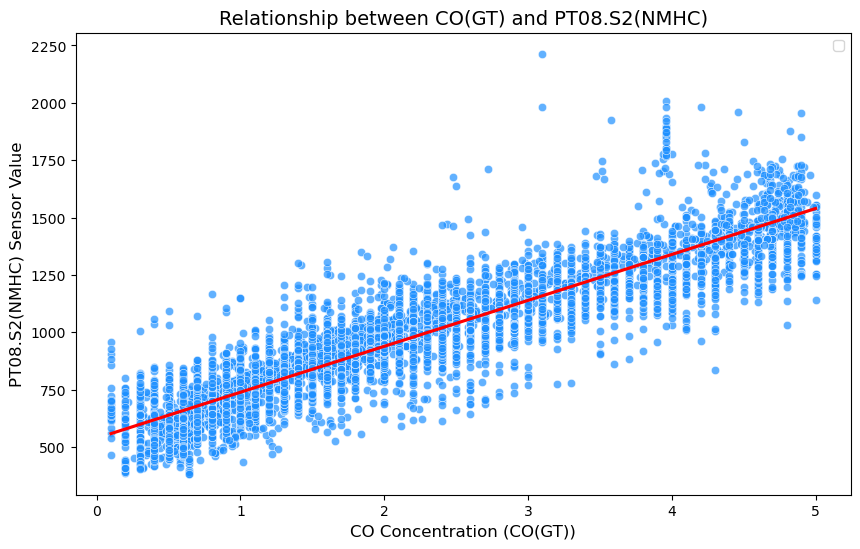

In [89]:
# Scatter plot to visualize the relationship between CO(GT) and PT08.S2(NMHC)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO(GT)', y='PT08.S2(NMHC)', data=df, color='dodgerblue', alpha=0.7)

# Add a trendline (linear regression line)
sns.regplot(x='CO(GT)', y='PT08.S2(NMHC)', data=df, scatter=False, color='red', line_kws={"label": "Trendline"})

# Adding labels and title
plt.xlabel('CO Concentration (CO(GT))', fontsize=12)
plt.ylabel('PT08.S2(NMHC) Sensor Value', fontsize=12)
plt.title('Relationship between CO(GT) and PT08.S2(NMHC)', fontsize=14)
plt.legend()
plt.show()

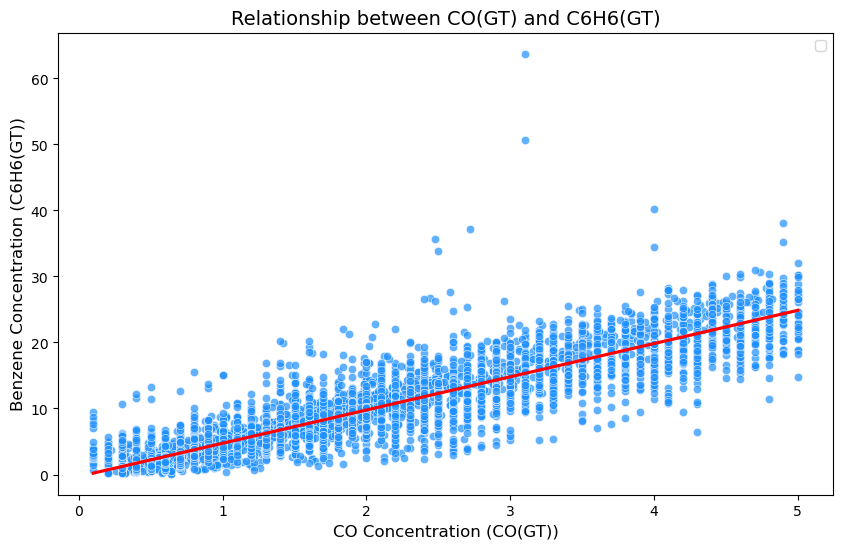

In [79]:
# Scatter plot to visualize the relationship between CO(GT) and C6H6(GT)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO(GT)', y='C6H6(GT)', data=df, color='dodgerblue', alpha=0.7)

# Add a trendline (linear regression line)
sns.regplot(x='CO(GT)', y='C6H6(GT)', data=df, scatter=False, color='red', line_kws={"label": "Trendline"})

# Adding labels and title
plt.xlabel('CO Concentration (CO(GT))', fontsize=12)
plt.ylabel('Benzene Concentration (C6H6(GT))', fontsize=12)
plt.title('Relationship between CO(GT) and C6H6(GT)', fontsize=14)
plt.legend()
plt.show()

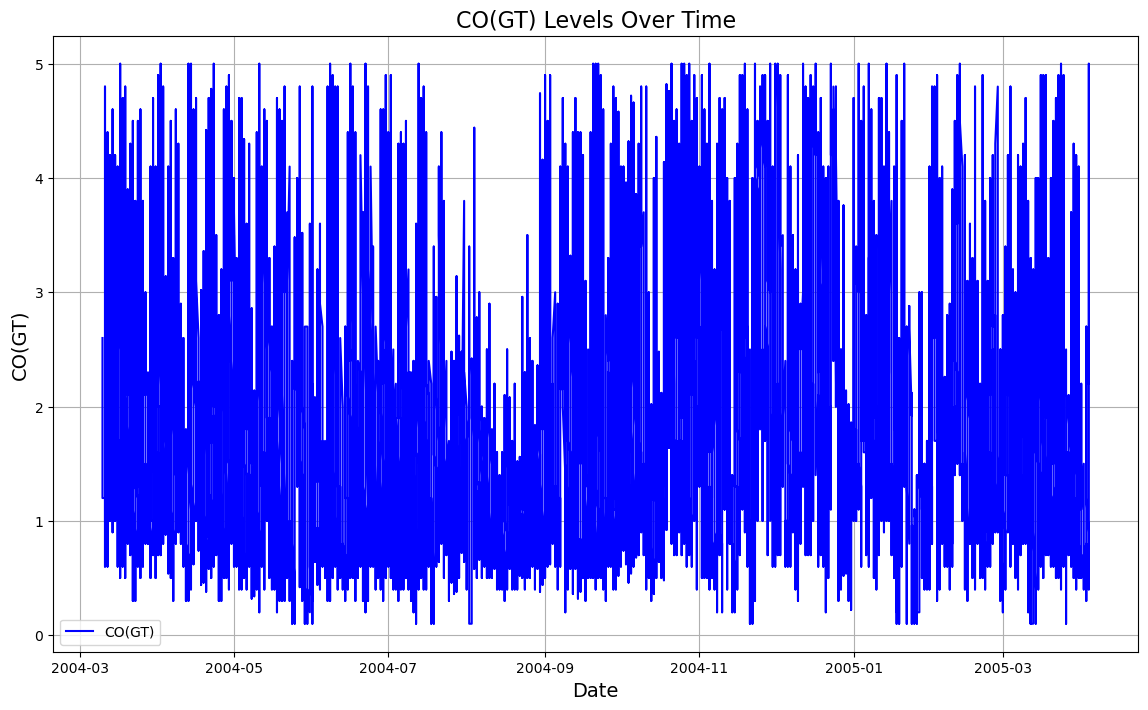

In [85]:
import numpy as np

# Replace pandas.NA with numpy.nan
df['CO(GT)'] = df['CO(GT)'].replace({pd.NA: np.nan})

# Drop rows with missing values in either 'Date' or 'CO(GT)'
df_cleaned = df.dropna(subset=['Date', 'CO(GT)'])

# Plot CO(GT) over time
plt.figure(figsize=(14, 8))
plt.plot(df_cleaned['Date'], df_cleaned['CO(GT)'], color="blue", label="CO(GT)")
plt.xlabel('Date', fontsize=14)
plt.ylabel('CO(GT)', fontsize=14)
plt.title('CO(GT) Levels Over Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

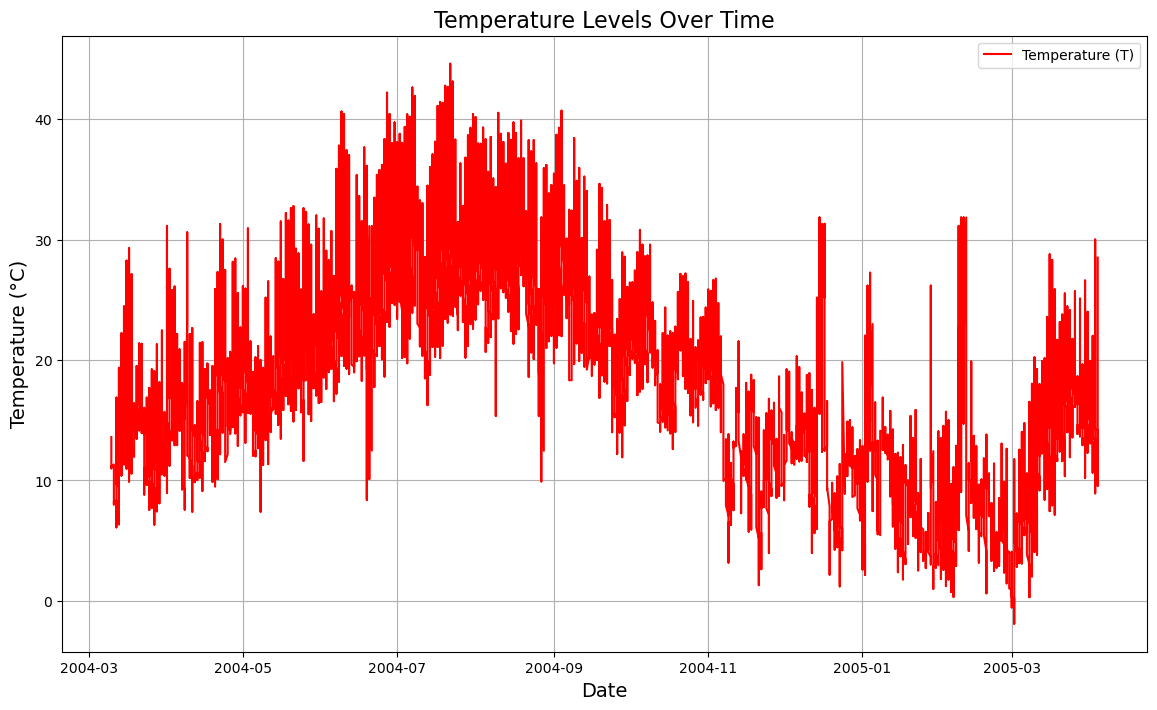

In [97]:
# Plot Temperature (T) over time
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['T'], color="red", label="Temperature (T)")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Temperature Levels Over Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

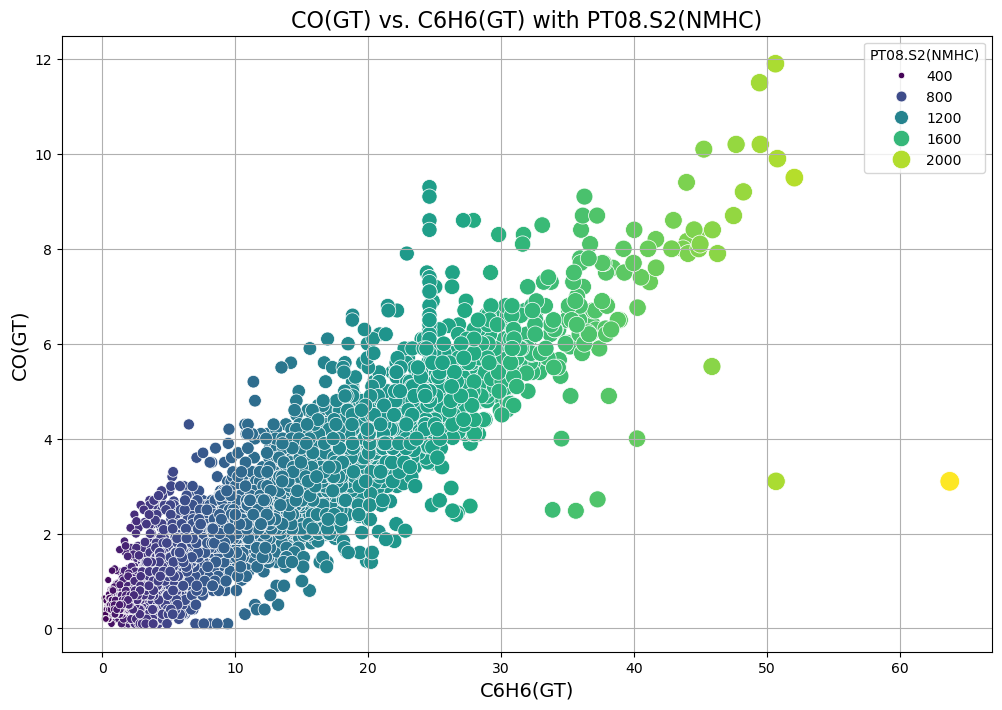

In [71]:
# Scatter plot for CO(GT) by C6H6(GT) and PT08.S2(NMHC)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='C6H6(GT)',
    y='CO(GT)',
    hue='PT08.S2(NMHC)',
    palette='viridis',
    size='PT08.S2(NMHC)',
    sizes=(20, 200)
)
plt.title('CO(GT) vs. C6H6(GT) with PT08.S2(NMHC)', fontsize=16)
plt.xlabel('C6H6(GT)', fontsize=14)
plt.ylabel('CO(GT)', fontsize=14)
plt.legend(title='PT08.S2(NMHC)')
plt.grid(True)
plt.show()

In [75]:
# Create the 'T Interval' feature based on the temperature conditions
df['T Interval'] = df['T'].apply(lambda t: 'Low Temp' if t < 10 else ('Normal Temp' if t <= 30 else 'High Temp'))

# Display the resulting DataFrame
print(df[['T', 'T Interval']])

           T   T Interval
0     13.600  Normal Temp
1     13.300  Normal Temp
2     11.900  Normal Temp
3     11.000  Normal Temp
4     11.150  Normal Temp
...      ...          ...
9352  21.850  Normal Temp
9353  24.325  Normal Temp
9354  26.900  Normal Temp
9355  28.325  Normal Temp
9356  28.500  Normal Temp

[9357 rows x 2 columns]


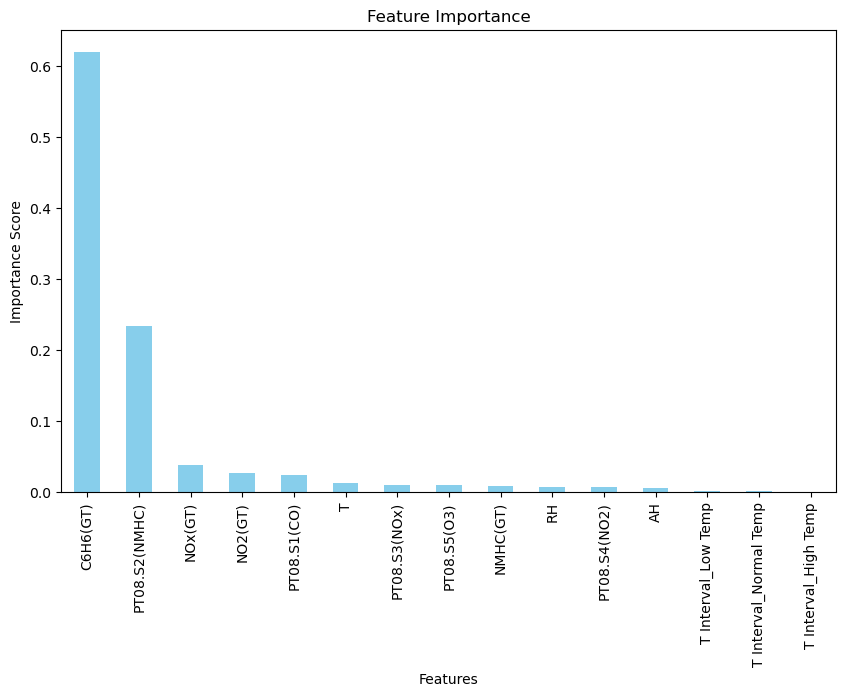

In [77]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=['T Interval'])

# Separate features and target
X = df_encoded.drop(columns=['CO(GT)', 'Date', 'Time'])  # Drop target and non-relevant columns
y = df_encoded['CO(GT)']

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   datetime64[ns]
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  T Interval     0 non-

# Normalize

In [87]:
# Drop non-numeric and irrelevant columns
X = df.drop(columns=['Date', 'Time', 'T Interval'])

# Initialize MinMaxScaler and apply it to the features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the first few rows of the normalized data
print("Normalized Data:\n", X_normalized.head())

Normalized Data:
      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
0  0.211864     0.511849  0.120981  0.184498       0.361737  0.111036   
1  0.161017     0.463196  0.088832  0.145428       0.312167  0.068382   
2  0.177966     0.542011  0.068528  0.139148       0.303701  0.087339   
3  0.177966     0.522980  0.061760  0.142780       0.308617  0.115098   
4  0.127119     0.448833  0.037225  0.100156       0.247030  0.087339   

   PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
0      0.311024  0.485777      0.513040     0.454654  0.333333  0.499057   
1      0.360796  0.393873      0.453125     0.326382  0.326882  0.484287   
2      0.346500  0.490153      0.451214     0.370588  0.296774  0.563168   
3      0.326168  0.525164      0.464366     0.426741  0.277419  0.638906   
4      0.374034  0.498906      0.422212     0.386228  0.280645  0.633564   

         AH  
0  0.280046  
1  0.264279  
2  0.276374  
3  0.294198  
4  0.295215  



Model Performance Comparison:
                             MSE  R² Score
Decision Tree           0.318214  0.851544
K-Nearest Neighbors     0.174707  0.918494
Random Forest           0.146787  0.931520
Support Vector Machine  0.177219  0.917322


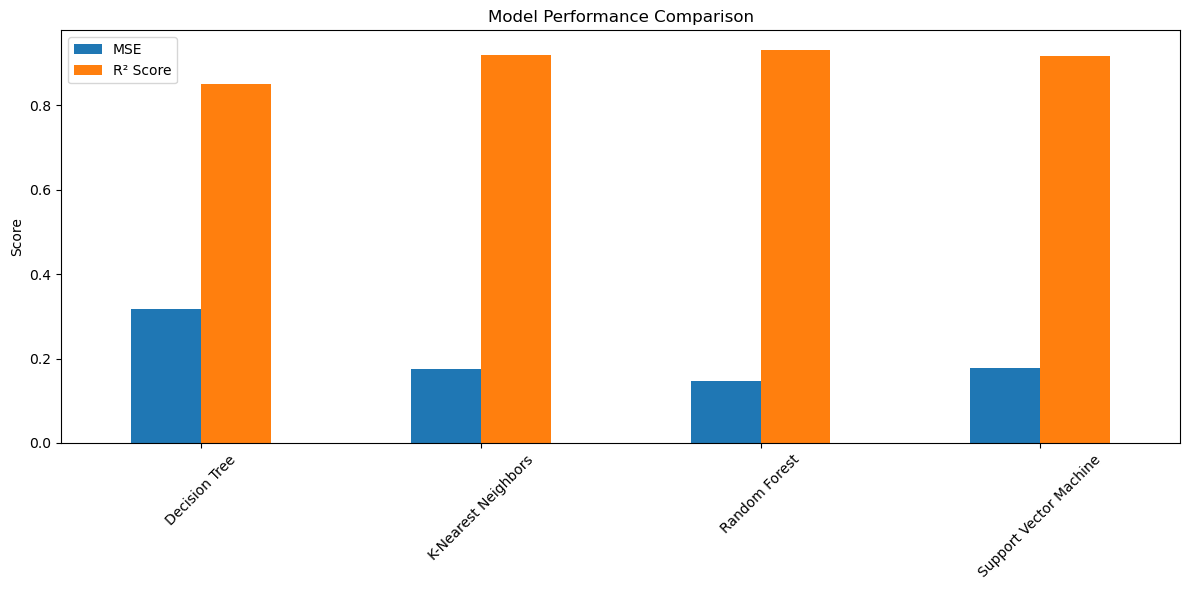

In [97]:
# Step 1: Data preparation
# Drop  irrelevant columns
X = df.drop(columns=['CO(GT)', 'Date', 'Time', 'T Interval'])
y = df['CO(GT)']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(kernel='rbf')
}

# Step 4: Train models and evaluate performance
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)   # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {'MSE': mse, 'R² Score': r2}

# Step 5: Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)

# Step 6: Visualize the performance comparison
results_df.plot(kind='bar', figsize=(12, 6), title='Model Performance Comparison', ylabel='Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Model Performance Comparison with Ranking:
                             MSE  R² Score  Rank
Random Forest           0.146787  0.931520     1
K-Nearest Neighbors     0.174707  0.918494     2
Support Vector Machine  0.177219  0.917322     3
Decision Tree           0.318214  0.851544     4


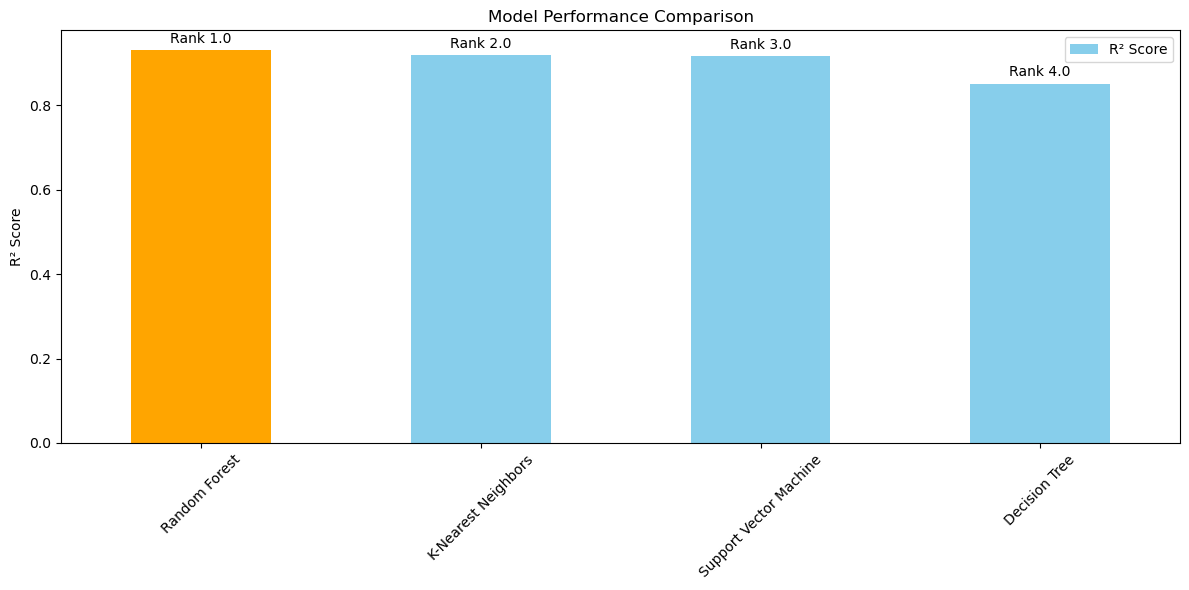

In [105]:
# Step 1: Data preparation (assuming df is already defined)
X = df.drop(columns=['CO(GT)', 'Date', 'Time', 'T Interval'])
y = df['CO(GT)']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(kernel='rbf')
}

# Step 4: Train models and evaluate performance
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {'MSE': mse, 'R² Score': r2}

# Step 5: Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Step 6: Rank models by R² Score and sort
results_df['Rank'] = results_df['R² Score'].rank(ascending=False, method='max').astype(int)
results_df = results_df.sort_values(by='R² Score', ascending=False)

# Display results
print("\nModel Performance Comparison with Ranking:")
print(results_df)

# Step 7: Visualize the performance comparison with a highlighted best model
best_model = results_df.index[0]  # Get the best model name

# Plot performance
ax = results_df[['R² Score']].plot(kind='bar', figsize=(12, 6), color='skyblue', title='Model Performance Comparison', ylabel='R² Score')
plt.xticks(rotation=45)

# Highlight the best model in orange
ax.patches[0].set_facecolor('orange')  # Highlight the first bar (best model)

# Add ranking labels above the bars
for i, (index, row) in enumerate(results_df.iterrows()):
    ax.text(i, row['R² Score'] + 0.01, f"Rank {row['Rank']}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Model Cross-Validation Performance with Ranking:
                        Cross-Validation R² (mean)  Cross-Validation R² (std)  \
Random Forest                             0.928182                   0.003783   
K-Nearest Neighbors                       0.918537                   0.003235   
Support Vector Machine                    0.914733                   0.004437   
Decision Tree                             0.847378                   0.010551   

                        Rank  
Random Forest              1  
K-Nearest Neighbors        2  
Support Vector Machine     3  
Decision Tree              4  


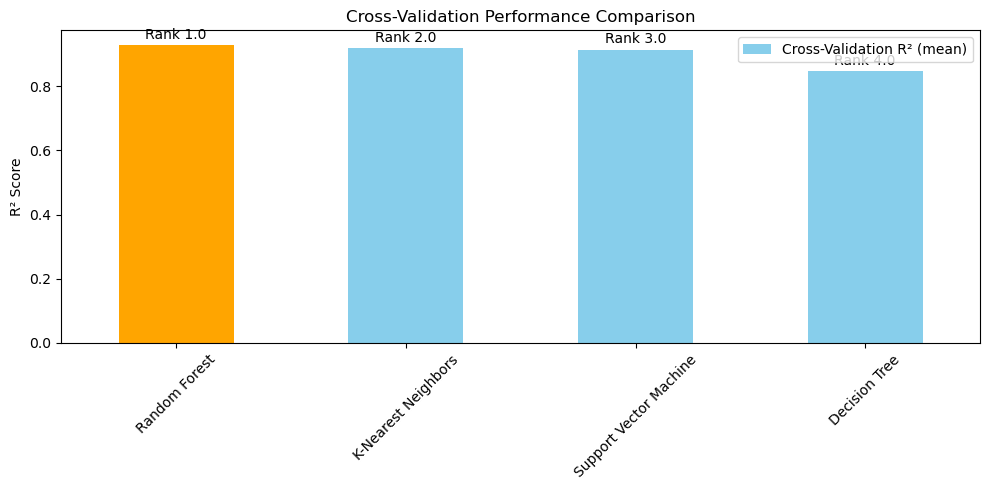

In [110]:
# Step 1: Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 2: Evaluate models using cross-validation
cv_results = {}
for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)

    # Store the cross-validation results
    cv_results[model_name] = {
        'Cross-Validation R² (mean)': np.mean(cv_scores),
        'Cross-Validation R² (std)': np.std(cv_scores)
    }

# Step 3: Convert results to DataFrame
cv_results_df = pd.DataFrame(cv_results).T

# Step 4: Add ranking and sort results
cv_results_df['Rank'] = cv_results_df['Cross-Validation R² (mean)'].rank(ascending=False, method='max').astype(int)
cv_results_df = cv_results_df.sort_values(by='Cross-Validation R² (mean)', ascending=False)

# Display results
print("\nModel Cross-Validation Performance with Ranking:")
print(cv_results_df)

# Step 5: Visualize results with highlighted best model
best_model = cv_results_df.index[0]  # Identify the best model

# Plot the performance comparison
ax = cv_results_df[['Cross-Validation R² (mean)']].plot(kind='bar', figsize=(10, 5), color='skyblue', title='Cross-Validation Performance Comparison', ylabel='R² Score')
plt.xticks(rotation=45)

# Highlight the best model in orange
ax.patches[0].set_facecolor('orange')

# Add ranking labels above the bars
for i, (index, row) in enumerate(cv_results_df.iterrows()):
    ax.text(i, row['Cross-Validation R² (mean)'] + 0.01, f"Rank {row['Rank']}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

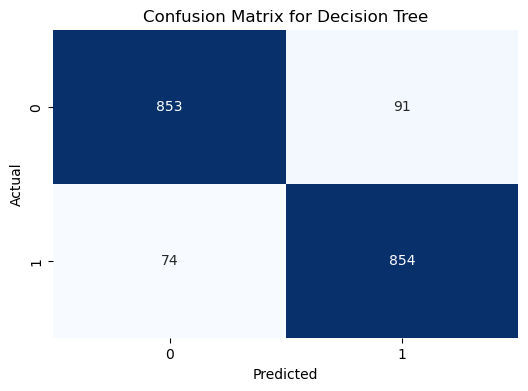

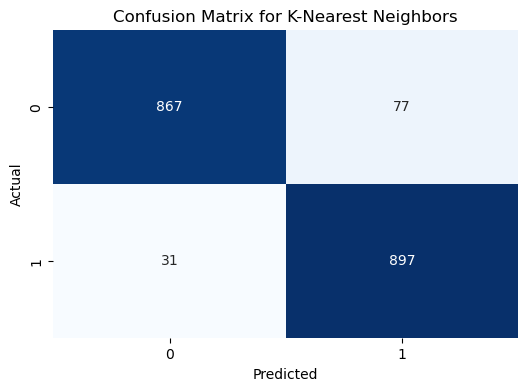

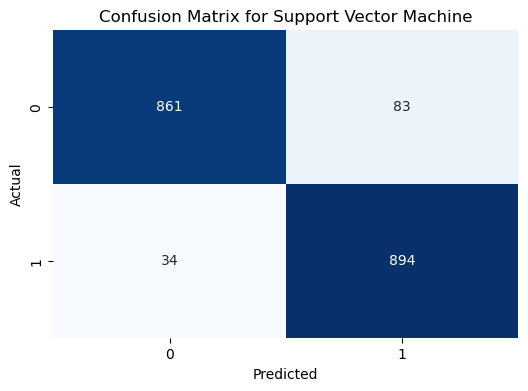

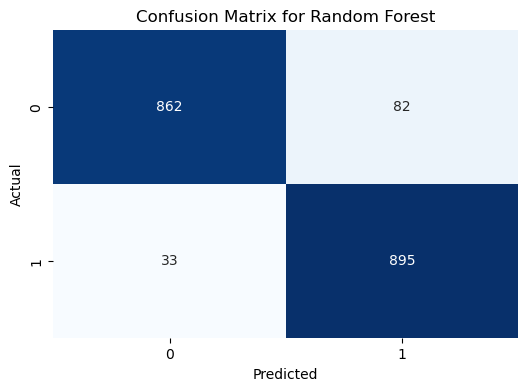


Model Confusion Matrix Performance with Ranking:
                    Model  Accuracy  Rank
1     K-Nearest Neighbors  0.942308     1
3           Random Forest  0.938568     2
2  Support Vector Machine  0.937500     3
0           Decision Tree  0.911859     4


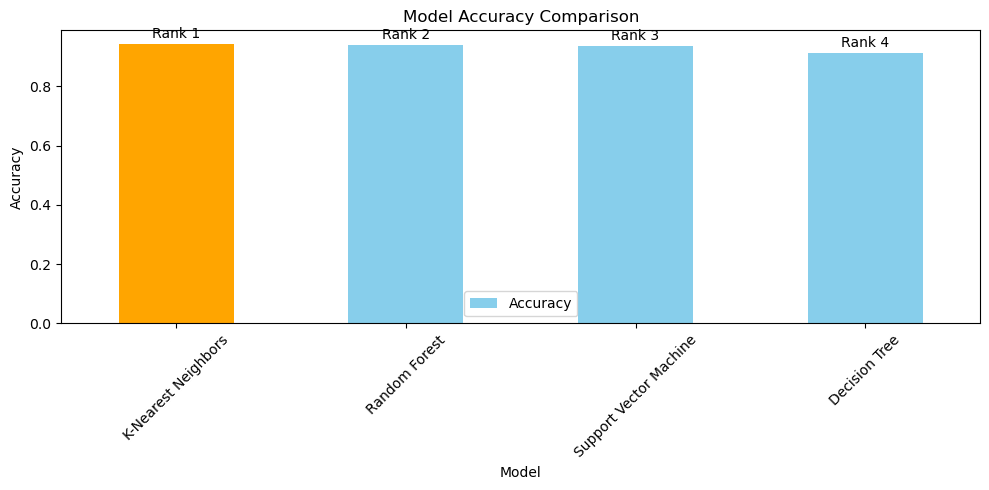

In [126]:
# Step 1: Convert regression targets to binary classes (for demonstration purposes)
y_test_class = (y_test > y_test.median()).astype(int)

# Step 2: Generate predictions for each model
model_predictions = {
    'Decision Tree': (models['Decision Tree'].predict(X_test) > y_test.median()).astype(int),
    'K-Nearest Neighbors': (models['K-Nearest Neighbors'].predict(X_test) > y_test.median()).astype(int),
    'Support Vector Machine': (models['Support Vector Machine'].predict(X_test) > y_test.median()).astype(int),
    'Random Forest': (models['Random Forest'].predict(X_test) > y_test.median()).astype(int)
}

# Step 3: Evaluate models and store confusion matrix metrics
confusion_results = {}
for model_name, y_pred_class in model_predictions.items():
    # Generate the confusion matrix
    cm = confusion_matrix(y_test_class, y_pred_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)

    # Store the confusion matrix results and accuracy
    confusion_results[model_name] = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy
    }

# Step 4: Display confusion matrices for each model
for model_name, y_pred_class in model_predictions.items():
    cm = confusion_results[model_name]['Confusion Matrix']
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Step 5: Evaluate models and store confusion matrix metrics
confusion_results = {}
for model_name, y_pred_class in model_predictions.items():
    # Generate the confusion matrix
    cm = confusion_matrix(y_test_class, y_pred_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)

    # Store the confusion matrix results and accuracy
    confusion_results[model_name] = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy
    }

# Step 6: Convert results to DataFrame and rank models by accuracy
accuracy_results = {model: result['Accuracy'] for model, result in confusion_results.items()}
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
accuracy_df['Rank'] = accuracy_df['Accuracy'].rank(ascending=False, method='max').astype(int)
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display results
print("\nModel Confusion Matrix Performance with Ranking:")
print(accuracy_df)

# Step 7: Visualize accuracy results with highlighted best model
ax = accuracy_df.plot(kind='bar', x='Model', y='Accuracy', figsize=(10, 5), color='skyblue',
                      title='Model Accuracy Comparison', ylabel='Accuracy')
plt.xticks(rotation=45)

# Highlight the best model in orange
ax.patches[0].set_facecolor('orange')

# Add ranking labels above the bars
for i, (index, row) in enumerate(accuracy_df.iterrows()):
    ax.text(i, row['Accuracy'] + 0.01, f"Rank {row['Rank']}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()